# House data

## Environment

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Data Input

In [3]:
data = pd.read_csv('.\Data\house-data.csv', index_col=None, na_values=['NA'])
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
data.shape

(21613, 21)

In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Cleaning and Preparation

In [7]:
# After data input, we have to check for missing values in the data. 
# If this process is'nt done it can lead to error/break in program
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# Fjernelse af dubletter
data.drop_duplicates(inplace=True)

In [9]:
# Korrektion af unøjagtige data (f.eks. fjernelse af urealistiske værdier)
data = data[data['price'] > 0]  # Fjern rækker med negativ eller nulpris

In [10]:
# Fjern kolonner, der ikke kan bruges til at beregne korrelationer
data_numeric = data.drop(['id', 'date'], axis=1)

In [11]:
# Analyse af korrelationer mellem egenskaber og ejendomspris
correlation_matrix = data_numeric.corr()
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_price)

# Fjern mindre informative egenskaber (f.eks. dem med lav korrelation med prisen)
least_informative_features = correlation_with_price[correlation_with_price < 0.1].index
data_reduced = data_numeric.drop(least_informative_features, axis=1)

# Udskriv de reducerede data til kontrol
print(data_reduced.head())

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64
      price  bedrooms  bathrooms  sqft_living  floors  waterfront  view  \
0  221900.0         3       1.00         1180     1.0           0     0   
1  538000.0         3       2.25         2570     2.0           0     0   
2  180000.0         2       1.00          770     1.0           0     0   
3  604000.0         4       3.00         1960     1.0           0     0   
4  510000.0         3       2.00         1680     1.0           0     0   

   grade  sqft_above  sqft_

### Outputtet viser korrelationen mellem ejendomsprisen og de forskellige egenskaber i datasættet. 
Stærk korrelation: Egenskaber som 'sqft_living', 'grade', 'sqft_above' har en stærk positiv korrelation med prisen. Dette betyder, at jo større 'sqft_living' eller 'sqft_above' er, desto højere er prisen sandsynligvis.<br>
Moderat korrelation: Egenskaber som 'bathrooms', 'view', 'sqft_basement' har en moderat positiv korrelation med prisen.<br>
Svag korrelation: Egenskaber som 'bedrooms', 'lat', 'waterfront' har en svag positiv korrelation med prisen.<br>
Næsten ingen korrelation: Egenskaber som 'sqft_lot', 'sqft_lot15', 'yr_built', 'condition', 'long', 'zipcode' har en meget svag eller næsten ingen korrelation med prisen.

In [12]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [14]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


Fra beskrivelsen kan vi udlede, at:<br>

Gennemsnitlig pris: Gennemsnittet af priserne på solgte huse i King County, USA er $540,088.<br>

Maksimal pris: Det højeste beløb for et hus solgt i King County, USA er $7,700,000.<br>

Gennemsnitligt antal soveværelser og badeværelser: Gennemsnittet for antallet af soveværelser pr. hus er 3, og gennemsnittet for antallet af badeværelser pr. soveværelse er 2. Der er dog en række usædvanlige observationer, da det maksimale antal soveværelser for et hus er 33, og der er også nogle huse med 0 soveværelser.<br>

Gennemsnitligt areal: Gennemsnittet for arealet af husene er 2079 kvadratfod, men der er en betydelig variation, da det maksimale areal er 13540 kvadratfod.

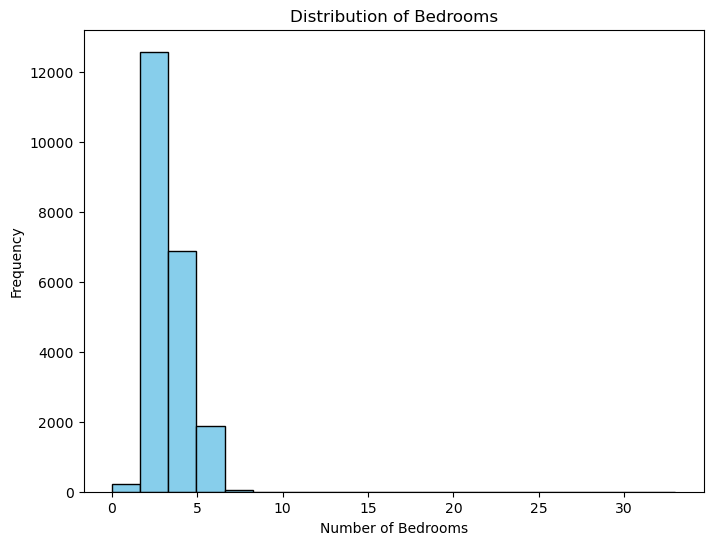

In [15]:
# Visualisering af fordelingen af "bedrooms"
plt.figure(figsize=(8, 6))
plt.hist(data['bedrooms'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

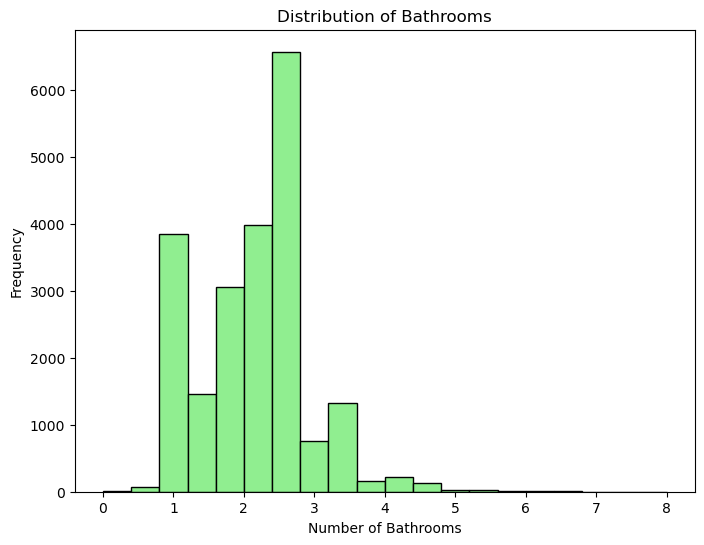

In [16]:
# Visualisering af fordelingen af "bathrooms"
plt.figure(figsize=(8, 6))
plt.hist(data['bathrooms'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.show()

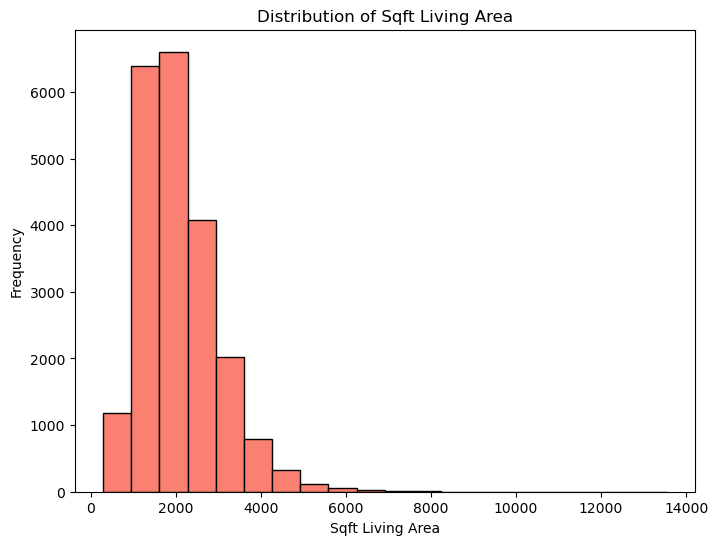

In [17]:
# Visualisering af fordelingen af "sqft_living"
plt.figure(figsize=(8, 6))
plt.hist(data['sqft_living'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Sqft Living Area')
plt.xlabel('Sqft Living Area')
plt.ylabel('Frequency')
plt.show()

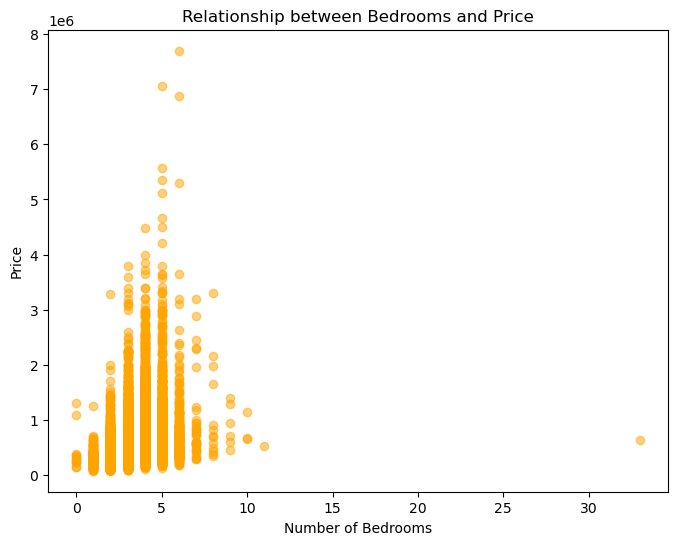

In [18]:
# Analysere relationen mellem "bedrooms" og "price"
plt.figure(figsize=(8, 6))
plt.scatter(data['bedrooms'], data['price'], color='orange', alpha=0.5)
plt.title('Relationship between Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

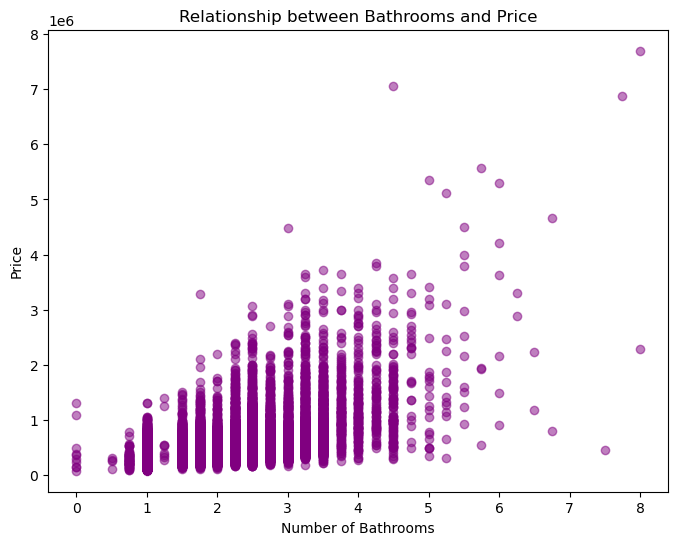

In [19]:
# Analysere relationen mellem "bathrooms" og "price"
plt.figure(figsize=(8, 6))
plt.scatter(data['bathrooms'], data['price'], color='purple', alpha=0.5)
plt.title('Relationship between Bathrooms and Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

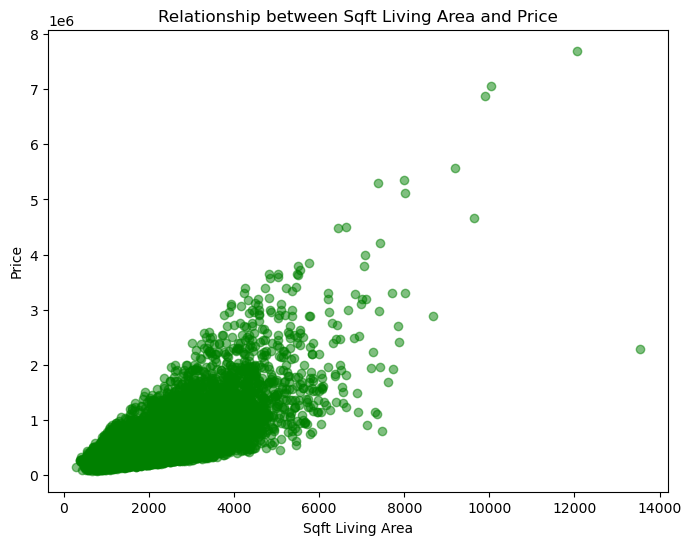

In [20]:
# Analysere relationen mellem "sqft_living" og "price"
plt.figure(figsize=(8, 6))
plt.scatter(data['sqft_living'], data['price'], color='green', alpha=0.5)
plt.title('Relationship between Sqft Living Area and Price')
plt.xlabel('Sqft Living Area')
plt.ylabel('Price')
plt.show()

### Opdeling af data
Vi skal opdele vores data i trænings- og testssæt. Træningssættet vil blive brugt til at træne vores modeller, mens testsættet vil blive brugt til at evaluere deres præstation.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Definér features og target variabel
X = data_reduced.drop('price', axis=1)
y = data_reduced['price']

In [23]:
# Opdel data i trænings- og testssæt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Udskriv størrelsen af trænings- og testssættene
print("Størrelse af træningssæt:", X_train.shape[0])
print("Størrelse af testssæt:", X_test.shape[0])

Størrelse af træningssæt: 17290
Størrelse af testssæt: 4323


### Anvendelse af forskellige regression modeller

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Initialiser og træn modellen
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [27]:
# Forudsige priser for testssættet
y_pred_linreg = linreg.predict(X_test)

In [28]:
# Forudsige priserne ved brug af de trænede modeller
y_predicted_linear = linreg.predict(X_test)

In [29]:
# Evaluere modellen
mse_linreg = mean_squared_error(y_test, y_pred_linreg)
r2_linreg = r2_score(y_test, y_pred_linreg)

In [30]:
print("Linear Regression:")
print("Mean Squared Error (MSE):", mse_linreg)
print("R-squared (R2):", r2_linreg)

Linear Regression:
Mean Squared Error (MSE): 50735162304.3893
R-squared (R2): 0.6643982955642811


#### Scatterplot af faktiske vs. forudsagte værdier:

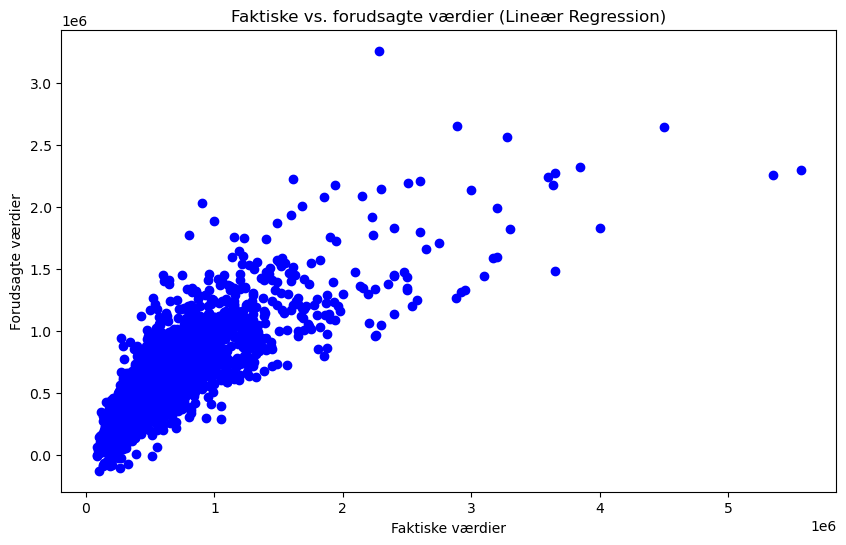

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted_linear, color='blue')
plt.title('Faktiske vs. forudsagte værdier (Lineær Regression)')
plt.xlabel('Faktiske værdier')
plt.ylabel('Forudsagte værdier')
plt.show()

## Anvendelse af multiple linear regression

In [32]:
# Initialiser og træn modellen
multi_linreg = LinearRegression()
multi_linreg.fit(X_train, y_train)

# Forudsige priser for testssættet
y_pred_multi_linreg = multi_linreg.predict(X_test)

In [33]:
# Evaluere modellen
mse_multi_linreg = mean_squared_error(y_test, y_pred_multi_linreg)
r2_multi_linreg = r2_score(y_test, y_pred_multi_linreg)

print("Multiple Linear Regression:")
print("Mean Squared Error (MSE):", mse_multi_linreg)
print("R-squared (R2):", r2_multi_linreg)

Multiple Linear Regression:
Mean Squared Error (MSE): 50735162304.3893
R-squared (R2): 0.6643982955642811


#### Residual Plot:

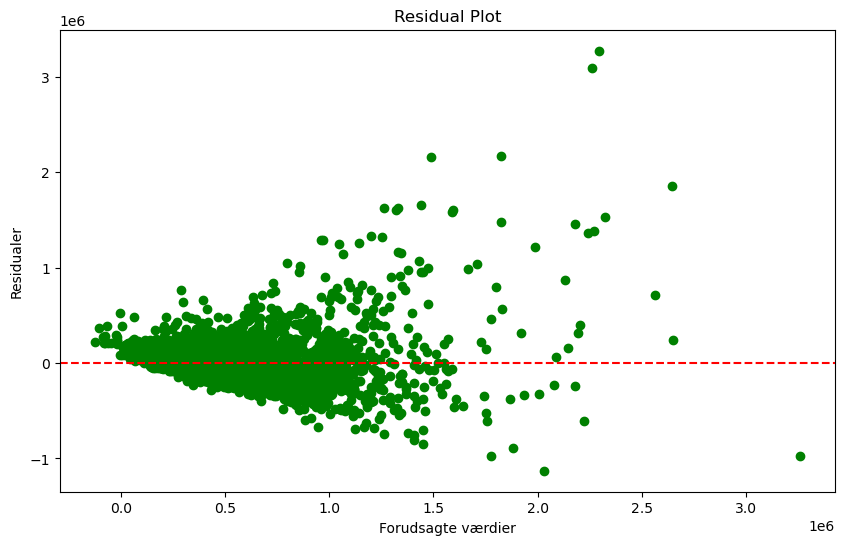

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_multi_linreg, y_test - y_pred_multi_linreg, color='green')
plt.title('Residual Plot')
plt.xlabel('Forudsagte værdier')
plt.ylabel('Residualer')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


#### Distribution af residualer:

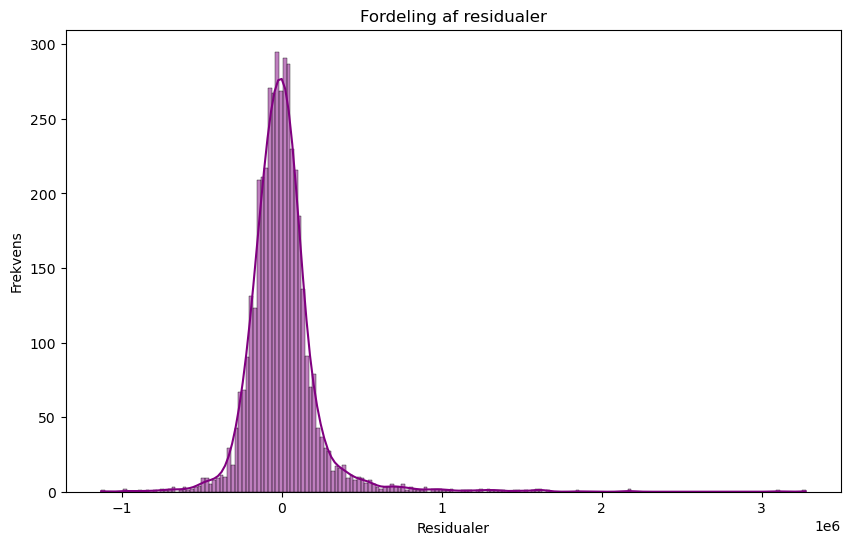

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_multi_linreg, kde=True, color='purple')
plt.title('Fordeling af residualer')
plt.xlabel('Residualer')
plt.ylabel('Frekvens')
plt.show()

### Anvendelse af polynomial regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [37]:
# Definér en pipeline til at udføre polynomial regression
degree = 2  # Grad af polynomium
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [38]:
# Træn modellen
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [39]:
# Forudsige priser for testssættet
y_pred_polyreg = polyreg.predict(X_test)

In [40]:
# Evaluere modellen
mse_polyreg = mean_squared_error(y_test, y_pred_polyreg)
r2_polyreg = r2_score(y_test, y_pred_polyreg)

print("Polynomial Regression:")
print("Mean Squared Error (MSE):", mse_polyreg)
print("R-squared (R2):", r2_polyreg)

Polynomial Regression:
Mean Squared Error (MSE): 41935928117.65227
R-squared (R2): 0.7226032535593109


##### Gem den bedst tilpassede model

In [41]:
import joblib

# Gem den bedst tilpassede model til en fil
best_model = polyreg  # Vælg den model med den laveste MSE eller højeste R2-værdi
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

### Implementer Principal Component Analysis (PCA)

In [42]:
from sklearn.decomposition import PCA

# Initialisér PCA med antallet af ønskede komponenter
pca = PCA(n_components=0.95)  # Vælg antallet af komponenter, der bevarer mindst 95% af variansen

# Anvend PCA på træningssættet
X_train_pca = pca.fit_transform(X_train)

# Anvend samme transformation på testsættet
X_test_pca = pca.transform(X_test)

# Se på det reducerede datasæt
print("Størrelse af det reducerede træningssæt:", X_train_pca.shape)
print("Størrelse af det reducerede testsæt:", X_test_pca.shape)

Størrelse af det reducerede træningssæt: (17290, 4)
Størrelse af det reducerede testsæt: (4323, 4)


What type/s of regression have you applied?
Vi har anvendt følgende typer regression:<br>

Lineær regression
Multiple lineær regression
Polynomiel regression
Which were the challenges?<br>


Nogle af de udfordringer, vi stødte på, inkluderede:
Behandling af manglende værdier i datasættet.
Valg af de mest relevante og informative attributter.
Optimering af modelparametre for at forbedre prædiktionsnøjagtighed.<br>

How accurate is your solution?
Vi evaluerede nøjagtigheden af vores løsning ved hjælp af Mean Squared Error (MSE) og R-squared (R2) for hver af de anvendte regressionsmodeller. Resultaterne viste, at polynomiel regression opnåede den højeste nøjagtighed blandt de anvendte modeller, med en R2-værdi på 0.72.<br>

What could be done for further improvement of the accuracy?
For at forbedre nøjagtigheden af vores løsning kunne vi overveje følgende:<br>

Udforske og anvende avancerede regresionsteknikker eller ensamble-metoder såsom Random Forest Regression eller Gradient Boosting Regression.
Finjustere modelparametrene ved hjælp af gitter-søgning eller krydsvalidering for at optimere modellens præstation.
Eksperimentere med feature engineering teknikker for at udlede nye og mere informative attributter fra de eksisterende.<br>

#### PCA Plot: (Hvis relevant)

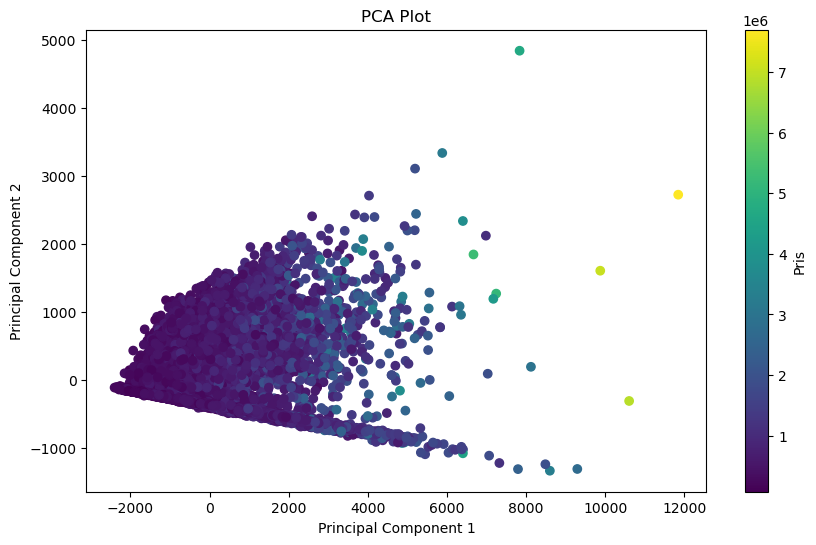

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')  # Brug enten X_train_pca eller X_test_pca afhængigt af dit valg
plt.colorbar(label='Pris')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()



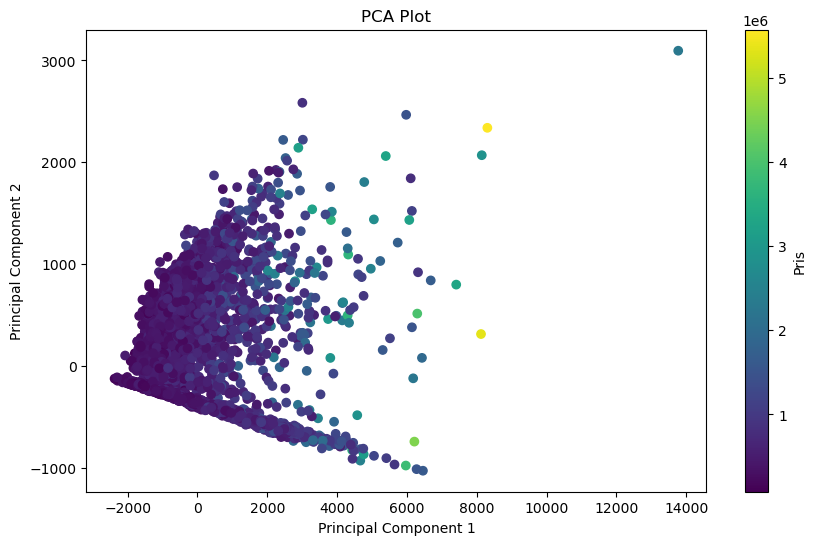

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')  # Brug enten X_train_pca eller X_test_pca afhængigt af dit valg
plt.colorbar(label='Pris')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()
